In [31]:
import pandas as pd
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [3]:
assets = ['VTI', 'IEF', 'GLD', 'DBC']
all_weather_df = pd.DataFrame()

for asset in assets:
    all_weather_df[asset] = si.get_data(asset, start_date='01/01/1980')['close']

In [4]:
weights = [0.3, 0.4, 0.075, 0.225]

In [5]:
returns = all_weather_df.pct_change()

In [6]:
weighted_returns = returns * weights

In [7]:
all_weather_df['portfolio'] = weighted_returns.sum(axis=1)

In [8]:
all_weather_df['cumulative_portfolio'] = (1 + all_weather_df['portfolio']).cumprod()

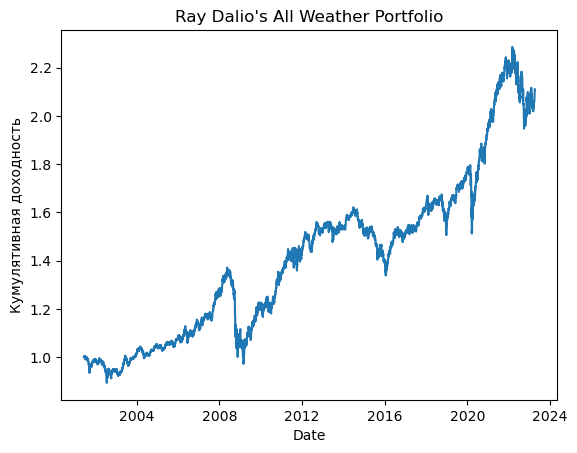

In [9]:
plt.plot(all_weather_df['cumulative_portfolio'])
plt.xlabel('Date')
plt.ylabel('Кумулятивная доходность')
plt.title('Ray Dalio\'s All Weather Portfolio')
plt.show()

In [10]:
all_weather_df

,VTI,IEF,GLD,DBC,portfolio,cumulative_portfolio
2001-06-15,55.665001,NaN,NaN,NaN,0.000000,1.000000
2001-06-18,55.310001,NaN,NaN,NaN,-0.001913,0.998087
2001-06-19,55.465000,NaN,NaN,NaN,0.000841,0.998926
2001-06-20,56.049999,NaN,NaN,NaN,0.003164,1.002087
2001-06-21,56.500000,NaN,NaN,NaN,0.002409,1.004500
...,...,...,...,...,...,...
2023-03-31,204.100006,99.120003,183.220001,23.740000,0.008426,2.091552
2023-04-03,204.639999,99.389999,184.539993,24.129999,0.006120,2.104352
2023-04-04,203.270004,100.029999,187.979996,24.100000,0.001686,2.107899
2023-04-05,202.529999,100.449997,187.830002,24.190001,0.001368,2.110782


In [11]:
# список тикеров портфеля
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

In [12]:
# загрузка данных о ценах закрытия для тикеров
prices = yf.download(tickers, start='2016-01-01', end='2021-12-31')['Adj Close']
prices.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2016-01-04,24.074741,31.849501,37.972000,49.007935
2016-01-05,23.471445,31.689501,38.076500,49.231518
2016-01-06,23.012114,31.632500,37.966499,48.337212
2016-01-07,22.040905,30.396999,37.049999,46.655918
2016-01-08,22.157446,30.352501,36.545502,46.799011


In [13]:
# расчет доходностей для каждого тикера
returns = prices.pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2016-01-05,-0.025059,-0.005024,0.002752,0.004562
2016-01-06,-0.019570,-0.001799,-0.002889,-0.018165
2016-01-07,-0.042204,-0.039058,-0.024140,-0.034783
2016-01-08,0.005287,-0.001464,-0.013617,0.003067
2016-01-11,0.016192,0.017610,0.002955,-0.000573


In [14]:
# расчет доходности портфеля
portfolio_returns = returns.mean(axis=1)
portfolio_returns.head()

Date
2016-01-05   -0.005692
2016-01-06   -0.010606
2016-01-07   -0.035046
2016-01-08   -0.001682
2016-01-11    0.009046
dtype: float64

In [15]:
# расчет стандартного отклонения доходности портфеля
portfolio_std = portfolio_returns.std()
portfolio_std

0.015248921824030986

In [16]:
# загрузка данных о безрисковой ставке
risk_free_rate = yf.download('^TNX', start='2016-01-01', end='2021-12-31')['Adj Close'].mean() / 100
risk_free_rate

[*********************100%***********************]  1 of 1 completed


0.01921211537339327

In [17]:
# расчет коэффициента Шарпа
sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_std
sharpe_ratio

-1.1743957125654843

In [18]:
# расчет волатильности портфеля
portfolio_volatility = returns.std(axis=1).mean()
portfolio_volatility

0.00797091913521314

In [19]:
# вывод результатов
print(f"Коэффициент Шарпа портфеля: {sharpe_ratio:.2f}")
print(f"Средняя волатильность портфеля: {portfolio_volatility:.2f}")

Коэффициент Шарпа портфеля: -1.17
Средняя волатильность портфеля: 0.01


In [76]:
tick = yf.download(['AAPL', 'MSFT', 'AMZN', 'GOOGL'], start='2022-01-01')

[*********************100%***********************]  4 of 4 completed


In [77]:
open = tick.pct_change().dropna()['Open']

In [79]:
open

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-01-04,0.026992,0.017237,0.002351,-0.001551
2022-01-05,-0.016536,-0.020858,-0.006713,-0.026790
2022-01-06,-0.038472,-0.020568,-0.051388,-0.039004
2022-01-07,0.001100,0.002377,0.008372,0.003193
2022-01-10,-0.022037,-0.019858,-0.022205,-0.014834
...,...,...,...,...
2023-03-31,0.005634,0.006007,0.003865,-0.001759
2023-04-03,0.011266,0.001370,0.010760,0.009833
2023-04-04,0.014184,0.004399,0.018947,0.002478


In [46]:
ta_open.std()

0.021366401591501244

<AxesSubplot:xlabel='Date', ylabel='Open'>

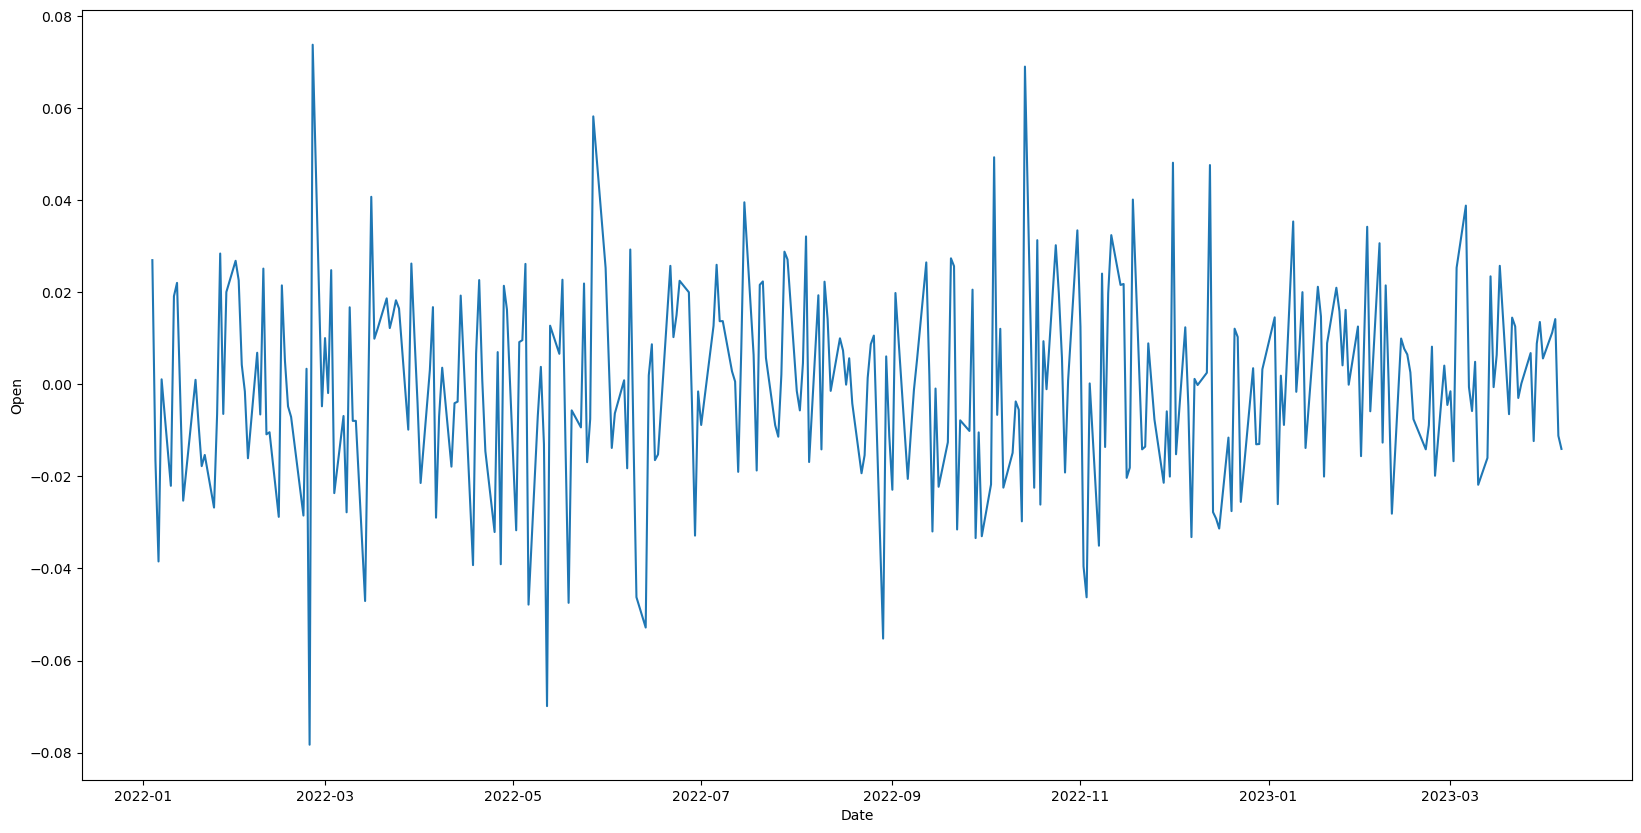

In [45]:
plt.figure(figsize=(20, 10))
sns.lineplot(ta_open)

In [101]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions

In [110]:
open.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-01-04,0.026992,0.017237,0.002351,-0.001551
2022-01-05,-0.016536,-0.020858,-0.006713,-0.026790
2022-01-06,-0.038472,-0.020568,-0.051388,-0.039004
2022-01-07,0.001100,0.002377,0.008372,0.003193
2022-01-10,-0.022037,-0.019858,-0.022205,-0.014834


In [120]:
# ежедневная доходность
returns = open.pct_change().dropna()
returns.AMZN

-inf

In [117]:
# оценка матрицы ковариации
cov_matrix = risk_models.risk_matrix(returns, method='sample_cov')
cov_matrix

LinAlgError: Eigenvalues did not converge

In [95]:
# прогноз ожидаемой доходности портфеля
mu = expected_returns.mean_historical_return(data)

# создание экземпляра класса EfficientFrontier
ef = EfficientFrontier(mu, cov_matrix)

# определение ограничений на портфель
# ограничение на общую сумму активов
ef.add_constraint(constraints.MaxWeight(0.1))

# определение целевой функции
ef.add_objective(objective_functions.L2_reg, gamma=1)

# оптимизация портфеля методом Шарпа
weights = ef.max_sharpe()

# вывод результатов
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


C:\Users\maxdo\anaconda3\Lib\site-packages\pypfopt\expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(


NameError: name 'cov_matrix' is not defined